# Cancer News Dataset

This notebook provides an overview of the PubMed dataset.

Downloaded: 04.10.2017

This notebook is structured as follows:

- Read in data
- A few plots
    - Complete dataset
    - Subset 2016

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import json
import operator
from itertools import chain

import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

In [2]:
sns.set_style("darkgrid")

# Read in dataset

In [3]:
# helpers to deal with various datatypes
def JSONParser(data):
    j = json.loads(data)
    if j: 
        return j
    else:
        return None

converters={"pmid": str,
       "doi": str,
       "title": str,
       "journal":str,
       "pub_year":int,
       "pub_types":JSONParser,
       "mesh_terms":JSONParser,
       "grants":JSONParser,
       "authors":JSONParser,
       "author_affils":JSONParser}

# read in data
df = pd.read_csv("../data/full_cancer_data.csv", converters=converters)

In [4]:
df = df[~df.pmid.duplicated(keep='first')]

In [5]:
# Seleceted MeSH descriptors and qualifiers
# all keywords have been transformed to lowercase
meshterms = ["urinary bladder neoplasms",
            "breast neoplasms",
            "colorectal neoplasms",
            "endometrial neoplasms",
            "kidney neoplasms",
            "leukemia",
            "liver neoplasms",
            "lung neoplasms",
            "melanoma",
            "lymphoma, non-hodgkins",
            "pancreatic neoplasms",
            "prostatic neoplasms",
            "thyroid neoplasms"]

meshqual = ["diagnosis",
            "diagnostic imaging",
            "mortality",
            "therapy",
            "diet therapy",
            "drug therapy",
            "nursing",
            "prevention & control",
            "radiotherapy",
            "rehabilitation",
            "surgery",
            "transplantation"]

# 2012-2017 vs 2016

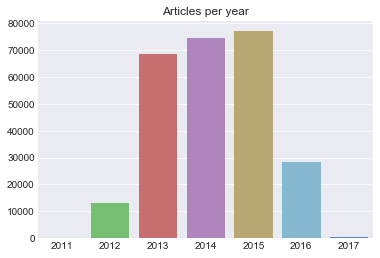

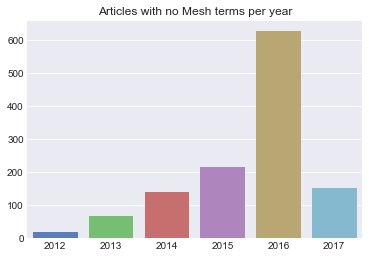

In [6]:
total = df.pub_year.value_counts()
bar_plot = sns.barplot(x=total.index,y=total.values, palette="muted")
bar_plot.set_title("Articles per year")
plt.show()

no_mesh = df[df.mesh_terms.isnull()].pub_year.value_counts()
bar_plot = sns.barplot(x=no_mesh.index,y=no_mesh.values, palette="muted")
bar_plot.set_title("Articles with no Mesh terms per year")
plt.show()

#bar_plot = sns.barplot(x=(no_mesh/total).index,y=(no_mesh/total).values, palette="muted")
#bar_plot.set_title("Proportion of no_mesh term articles per year")
#plt.show()

# Just 2016 dataset - MeSH terms

In [7]:
df16 = df[df['pub_year'] == 2016]
# df16.to_csv("data/cancer_data_2016.csv")

## Selected descriptors vs all descriptors

In [8]:
# Get MeSH descriptors from JSON column
mesh_descriptors = df16.mesh_terms.apply(lambda x: list(x.keys()) if x is not None else None)
df_meshterms = pd.DataFrame([sub if sub is not None else [] for sub in mesh_descriptors])
mesh_counts = df_meshterms.stack().value_counts()

# Write MeSH term CSVs
# mesh_counts.to_csv("data/mesh_descriptors.csv")

In [9]:
d = dict((k.lower(), v) for k,v in mesh_counts.to_dict().items())
cancer_mesh = dict((k, d[k]) for k in meshterms if k in d)

sorted_meshterms = list(df_meshterms.stack().value_counts().index)
indices = {}
for key in meshterms:
    try:
        indices[key] = sorted_meshterms.index(key)
    except:
        None
indices = sorted(indices.items(), key=operator.itemgetter(1))

breast neoplasms              :    16. (n=2413)
lung neoplasms                :    22. (n=1637)
liver neoplasms               :    34. (n=1055)
colorectal neoplasms          :    39. (n=996)
prostatic neoplasms           :    42. (n=971)
pancreatic neoplasms          :    85. (n=601)
melanoma                      :   103. (n=510)
kidney neoplasms              :   192. (n=289)
thyroid neoplasms             :   219. (n=245)
urinary bladder neoplasms     :   236. (n=232)
leukemia                      :   321. (n=168)
endometrial neoplasms         :   324. (n=165)


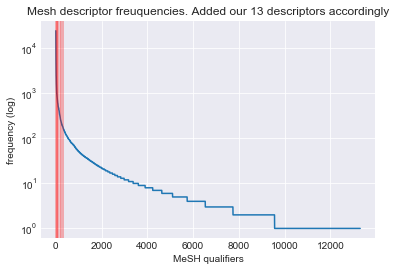

In [10]:
plt.plot(df_meshterms.stack().value_counts().values)
plt.yscale('log')
for key, xc in indices:
    print("{0:30}: {1:5}. (n={2})".format(key, xc, cancer_mesh[key]))
    plt.axvline(x=xc,c='r',lw=.3)    
plt.title('Mesh descriptor freuquencies. Added our 13 descriptors accordingly')
plt.ylabel('frequency (log)')
plt.xlabel('MeSH qualifiers')
plt.show()

# Selected qualifiers vs all qualifiers

In [11]:
# Get all MeSH qualifiers from JSON column (doesn't preserve relation btw desc and qual)
mesh_qualifiers = df16.mesh_terms.apply(lambda x: list(chain.from_iterable(x.values())) if x is not None else None)
mesh_qualifiers = [[term for term in terms if term != 'NA'] for terms in mesh_qualifiers if terms is not None]
df_meshquals = pd.DataFrame([sub if sub is not None else [] for sub in mesh_qualifiers])
qual_counts = df_meshquals.stack().value_counts()

# Write qualifiers to CSV
# qual_counts.to_csv("data/mesh_qualifiers.csv")

In [12]:
d = dict((k.lower(), v) for k,v in qual_counts.to_dict().items())
cancer_qual = dict((k, d[k]) for k in meshqual if k in d)

sorted_meshterms = list(df_meshquals.stack().value_counts().index)
indices = {}
for key in meshqual:
    try:
        indices[key] = sorted_meshterms.index(key)
    except:
        None
indices = sorted(indices.items(), key=operator.itemgetter(1))

drug therapy                  :     7. (n=8556)
diagnosis                     :    12. (n=4825)
therapy                       :    16. (n=3978)
mortality                     :    17. (n=3951)
surgery                       :    19. (n=3405)
diagnostic imaging            :    23. (n=2278)
prevention & control          :    29. (n=1673)
radiotherapy                  :    38. (n=1087)
transplantation               :    58. (n=190)
rehabilitation                :    60. (n=140)
diet therapy                  :    65. (n=76)
nursing                       :    68. (n=61)


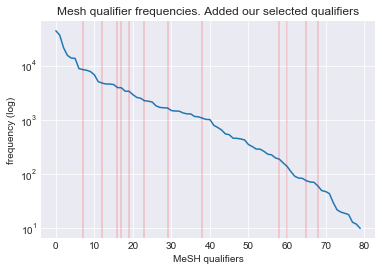

In [13]:
plt.plot(df_meshquals.stack().value_counts().values)
plt.yscale('log')
for key, xc in indices:
    print("{0:30}: {1:5}. (n={2})".format(key, xc, cancer_qual[key]))
    plt.axvline(x=xc,c='r',lw=.3)    
plt.title('Mesh qualifier frequencies. Added our selected qualifiers')
plt.ylabel('frequency (log)')
plt.xlabel('MeSH qualifiers')
plt.show()

# Create dummy variables & write CSV

In [14]:
def mesh_hash(desc, qual=None):
    if qual:
        a = "-".join(list(map(lambda x: x[:4], desc.split(' ')[:1] if ' ' in desc else [desc])))
        if qual == 'diagnostic imaging':
            b = "-".join(list(map(lambda x: x[:4], qual.split(' ')[:1] if ' ' in qual else [qual]))) + "-img"
        else:
            b = "-".join(list(map(lambda x: x[:4], qual.split(' ')[:1] if ' ' in qual else [qual])))
        return '{}_{}'.format(a,b)
    else:
        return "-".join(list(map(lambda x: x[:4], desc.split(' ')[:1] if ' ' in desc else [desc])))

In [15]:
categories=[]
for desc in meshterms:
    categories.append(mesh_hash(desc))
    for qual in meshqual:
        categories.append(mesh_hash(desc, qual))
categories.append('pmid')

In [16]:
pubtype_dummies = pd.get_dummies(pd.DataFrame(df16.pub_types.values.tolist()),prefix_sep='', prefix='')

In [17]:
rows = []
for rid, row in df16[['pmid','mesh_terms']].iterrows():
    temp_dict = [0] * 169 + [row['pmid']]
    
    if row['mesh_terms']:
        mesh = { a: row['mesh_terms'][a] for a in meshterms if a in row['mesh_terms']}
        for key, quals in mesh.items():
            temp_dict[categories.index(mesh_hash(key))] = 1
            for qual in quals:
                if qual in meshqual:
                    temp_dict[categories.index(mesh_hash(key, qual))] = 1

    rows.append(temp_dict)
mesh_dummies = pd.DataFrame(rows, columns=categories)

In [18]:
result = df16[["pmid","doi","title","journal","pub_year","pub_types","grants","authors","author_affils"]]    
result.merge(mesh_dummies, on='pmid', how='inner')

# Write results to CSV
# result.to_csv("data/2016_with_dummies.csv")

,pmid,doi,title,journal,pub_year,pub_types,grants,authors,author_affils,urin,...,thyr_mort,thyr_ther,thyr_diet,thyr_drug,thyr_nurs,thyr_prev,thyr_radi,thyr_reha,thyr_surg,thyr_tran
0,26738017,10.1109/EMBC.2015.7320117,A clinically oriented system for melanoma diag...,Conference proceedings : ... Annual Internatio...,2016,"[Journal Article, Research Support, Non-U.S. G...",None,"[Catarina Barata, M Emre Celebi, Jorge S Marques]","[NA, NA, NA, NA]",0,...,0,0,0,0,0,0,0,0,0,0
1,26737991,10.1109/EMBC.2015.7320091,Human feasibility study of fluorescence spectr...,Conference proceedings : ... Annual Internatio...,2016,"[Journal Article, Research Support, Non-U.S. G...",None,"[Priya N Werahera, Edward A Jasion, Yongjun Li...","[NA, NA, NA, NA, NA, NA, NA, NA, NA, NA]",0,...,0,0,0,0,0,0,0,0,0,0
2,26737959,10.1109/EMBC.2015.7320059,Robust automatic breast cancer staging using a...,Conference proceedings : ... Annual Internatio...,2016,"[Journal Article, Research Support, N.I.H., Ex...","[P30 CA072720, R01 LM009239, R01 CA156386, R01...","[Hai Su, Yong Shen, Fuyong Xing, Xin Qi, Kim M...","[NA, NA, NA, NA, NA, NA, NA, NA]",0,...,0,0,0,0,0,0,0,0,0,0
3,26737957,10.1109/EMBC.2015.7320057,Texture analysis for colorectal tumour biopsie...,Conference proceedings : ... Annual Internatio...,2016,"[Journal Article, Research Support, Non-U.S. G...",None,"[Remy Peyret, Ahmed Bouridane, Somaya Ali Al-M...","[NA, NA, NA, NA, NA, NA]",0,...,0,0,0,0,0,0,0,0,0,0
4,26737925,10.1109/EMBC.2015.7320025,In-vivo cell and tissue monitoring with active...,Conference proceedings : ... Annual Internatio...,2016,"[Journal Article, Research Support, Non-U.S. G...",None,"[Johannes F Clauss, Walter Wirths, Michael Roo...","[NA, NA, NA, NA, NA, NA, NA]",0,...,0,0,0,0,0,0,0,0,0,0
5,26737924,10.1109/EMBC.2015.7320024,Sensor-based microphysiometry.,Conference proceedings : ... Annual Internatio...,2016,"[Journal Article, Research Support, Non-U.S. G...",None,[M Brischwein],"[NA, NA]",0,...,0,0,0,0,0,0,0,0,0,0
6,26737917,10.1109/EMBC.2015.7320017,Multiple-instance learning for breast cancer d...,Conference proceedings : ... Annual Internatio...,2016,"[Journal Article, Research Support, Non-U.S. G...",None,"[Rubén Sánchez de la Rosa, Mathieu Lamard, Guy...","[NA, NA, NA, NA, NA, NA, NA]",0,...,0,0,0,0,0,0,0,0,0,0
7,26737904,10.1109/EMBC.2015.7320004,Tensor based tumor tissue type differentiation...,Conference proceedings : ... Annual Internatio...,2016,"[Journal Article, Research Support, Non-U.S. G...",None,"[H N Bharath, D M Sima, N Sauwen, U Himmelreic...","[NA, NA, NA, NA, NA, NA, NA]",0,...,0,0,0,0,0,0,0,0,0,0
8,26737879,10.1109/EMBC.2015.7319979,Analysis of Low Intensity Laser Therapy as adj...,Conference proceedings : ... Annual Internatio...,2016,"[Journal Article, Research Support, Non-U.S. G...",None,"[F Fanjul-Vélez, I Salas-García, C Torre-Celei...","[NA, NA, NA, NA, NA, NA]",0,...,0,0,0,0,0,0,0,0,0,0
9,26737877,10.1109/EMBC.2015.7319977,Modeling Tumor Treating Fields (TTFields) appl...,Conference proceedings : ... Annual Internatio...,2016,"[Journal Article, Research Support, N.I.H., In...",None,"[Cornelia Wenger, Moshe Giladi, Ze'ev Bomzon, ...","[NA, NA, NA, NA, NA, NA, NA]",0,...,0,0,0,0,0,0,0,0,0,0
